## Sample Distribution Visualization and Statistical Significance Tests of the SpeakQL Dialect User Study

This document contains exploratory data analysis consisting of distribution visualization of dependent variables in aggregate, and separated by individual queries in the data.

It also contains statistical significance tests consisting of Mann-Whitney U tests and independent T-tests.

In [1]:
import lib.db_connector as db_connector
import pandas as pd

#Set to true if database connection is not available
local = True

if not local:
    db = db_connector.DbConnector(db_name = 'speakql_study', verbose = False)

In [2]:
if not local:
    # query = open("./queries/get_all_final_attempts.sql").read()
    query = open("./queries/get_all_final_attempts_with_feature_usage.sql").read()
    df = db.do_single_select_query_into_dataframe(query)
    df.to_excel('./data/df/sample-distribution-and-tests-df.xlsx')
else:
    df = pd.read_excel('./data/df/sample-distribution-and-tests-df.xlsx')
    
df = df.drop_duplicates(subset=['idparticipant', 'idquery', 'idstep']).dropna(how = 'all')
df = df.where(df.ispractice == 0).dropna(how = 'all')
df = df.where(df.idparticipant != 18).dropna(how = 'all') #dropping bad data due to note taking

df['relative_step'] = df.apply(lambda row: row.idstep - 6 if row.idstep < 19 else row.step - 18, axis = 1)

df_sql = df.where(df.usedspeakql == 0).dropna(how = 'all')
df_speakql = df.where(df.usedspeakql == 1).dropna(how = 'all')
print(df_sql.shape[0], df_speakql.shape[0])

251 251


In [3]:
df[['groupnum', 'speakql_first']]


,groupnum,speakql_first
135,group2,0.0
136,group2,0.0
137,group2,0.0
138,group2,0.0
139,group2,0.0
...,...,...
657,group1,1.0
658,group2,0.0
659,group2,0.0
660,group2,0.0


In [4]:
df.columns

Index(['Unnamed: 0', 'idparticipant', 'idsession', 'idattemptsubmission',
       'idquery', 'idstep', 'attemptnum', 'total_time', 'recording_time',
       'planning_time', 'tot_pt', 'first_pt', 'tot_tt', 'groupnum', 'step',
       'speakql_first', 'language', 'ispractice', 'correct', 'usedspeakql',
       'complexity', 'normalized', 'is_complex', 'num_mods', 'num_joins',
       'num_funcs', 'num_proj', 'num_tables', 'num_selections',
       'used_unbundling', 'unbundling_possible', 'used_natural_functions',
       'natural_functions_possible', 'used_mod_ordering',
       'mod_ordering_possible', 'used_expression_ordering',
       'expression_ordering_possible', 'used_synonyms', 'synonyms_possible',
       'relative_step'],
      dtype='object')

In [5]:
df.used_unbundling = df.used_unbundling.fillna(0)
df.unbundling_possible = df.unbundling_possible.fillna(0)
df.used_natural_functions = df.used_natural_functions.fillna(0)
df.natural_functions_possible = df.natural_functions_possible.fillna(0)
df.used_mod_ordering = df.used_mod_ordering.fillna(0)
df.mod_ordering_possible = df.mod_ordering_possible.fillna(0)
df.used_expression_ordering = df.used_expression_ordering.fillna(0)

In [6]:
OUTLIER_THRESHOLD = 1200

df_speakql = df_speakql.where(df_speakql.tot_pt < OUTLIER_THRESHOLD).dropna(how = 'all')
df_sql = df_sql.where(df_sql.tot_pt < OUTLIER_THRESHOLD).dropna(how = 'all')
df = df.where(df.tot_pt < OUTLIER_THRESHOLD).dropna(how = 'all')

In [7]:
df.to_excel("./getallfinalattemptsdf.xlsx")

### Planning Time Distribution

#### SpeakQL:

<AxesSubplot:>

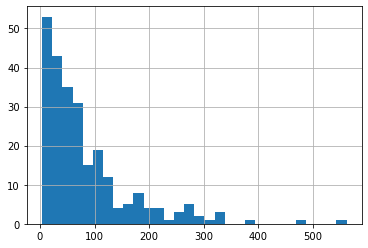

In [8]:
df_speakql.where(df_speakql.tot_pt < OUTLIER_THRESHOLD).dropna(how = 'all').tot_pt.hist(bins = 30)

<AxesSubplot:>

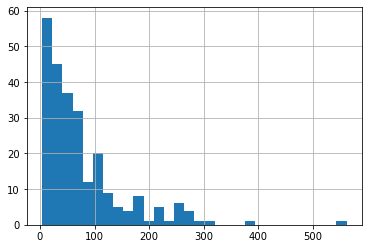

In [9]:
df_speakql.where(df_speakql.first_pt < OUTLIER_THRESHOLD).dropna(how = 'all').first_pt.hist(bins = 30)

#### SQL:

<AxesSubplot:>

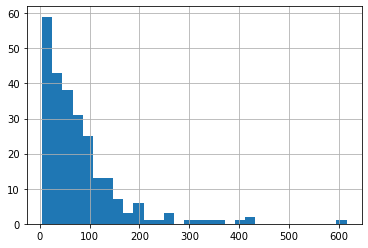

In [10]:
df_sql.where(df_sql.tot_pt < OUTLIER_THRESHOLD).dropna(how = 'all').tot_pt.hist(bins = 30)

<AxesSubplot:>

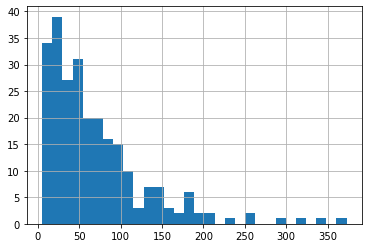

In [11]:
df_sql.where(df_sql.first_pt < OUTLIER_THRESHOLD).dropna(how = 'all').first_pt.hist(bins = 30)

### Number of Attempts Distribution:

#### SpeakQL:

<AxesSubplot:>

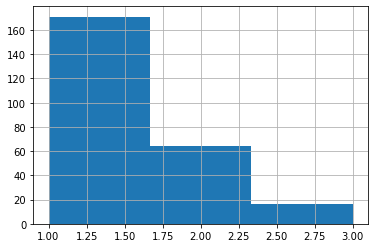

In [12]:
df_speakql.where(df_speakql.tot_pt < OUTLIER_THRESHOLD).dropna(how = 'all').attemptnum.hist(bins = 3)

#### SQL

<AxesSubplot:>

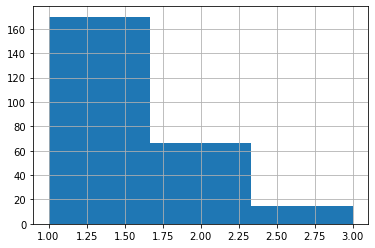

In [13]:
df_sql.where(df_sql.tot_pt < OUTLIER_THRESHOLD).dropna(how = 'all').attemptnum.hist(bins = 3)

### By Query Analysis

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

#### Distribution by Query:

#### SpeakQL - Total Planning Time

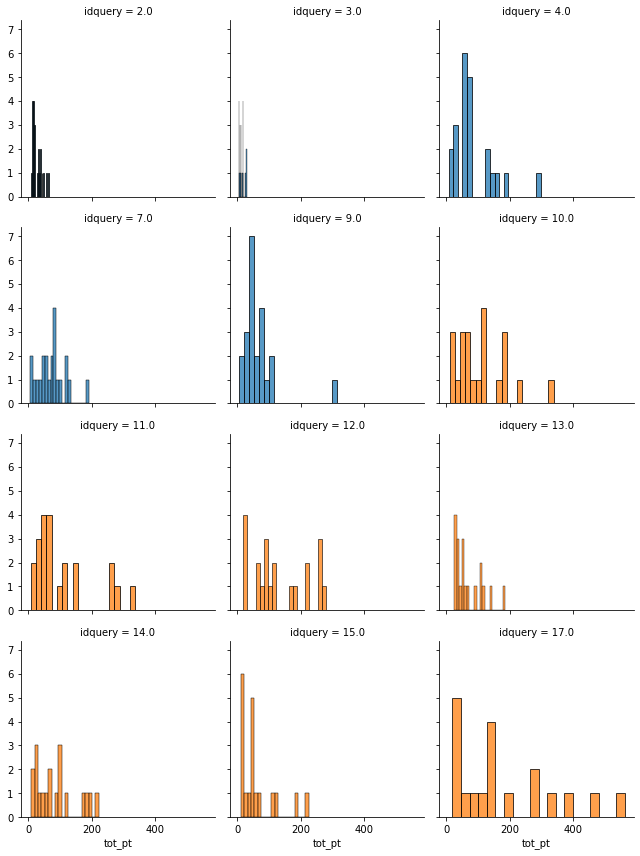

In [15]:
g = sns.FacetGrid(df_speakql[['idquery', 'tot_pt', 'is_complex']], col='idquery', hue='is_complex', col_wrap = 3)
g.map(sns.histplot, 'tot_pt', discrete = False, bins = 20)

#### SpeakQL - Attempt Number

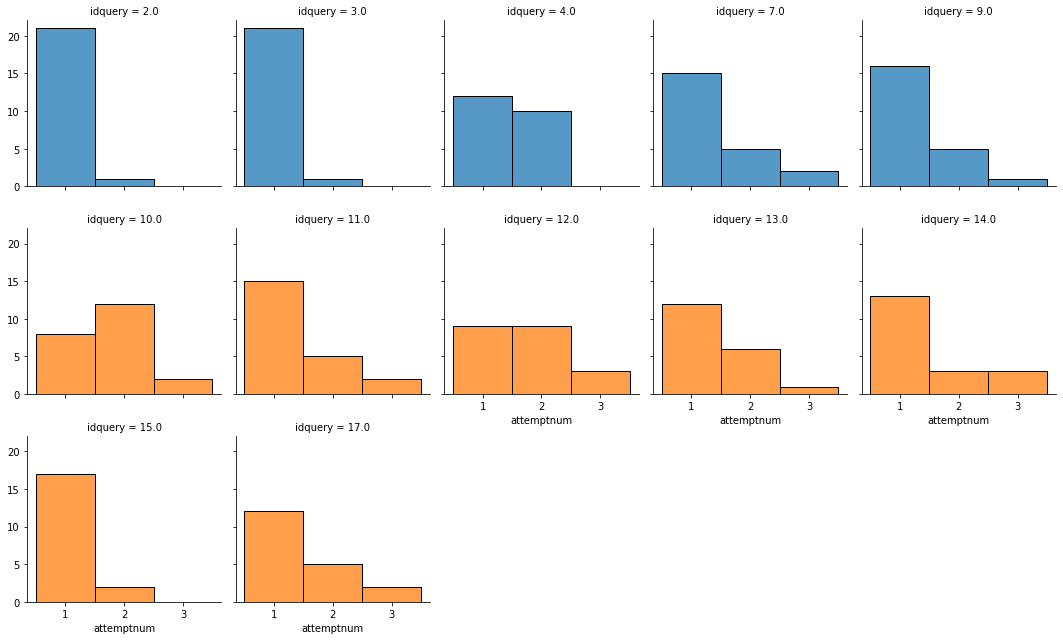

In [16]:
g = sns.FacetGrid(df_speakql[['idquery', 'attemptnum', 'is_complex']], col='idquery', hue='is_complex', col_wrap = 5)
g.map(sns.histplot, 'attemptnum', discrete = True)

#### SQL - Total Planning Time

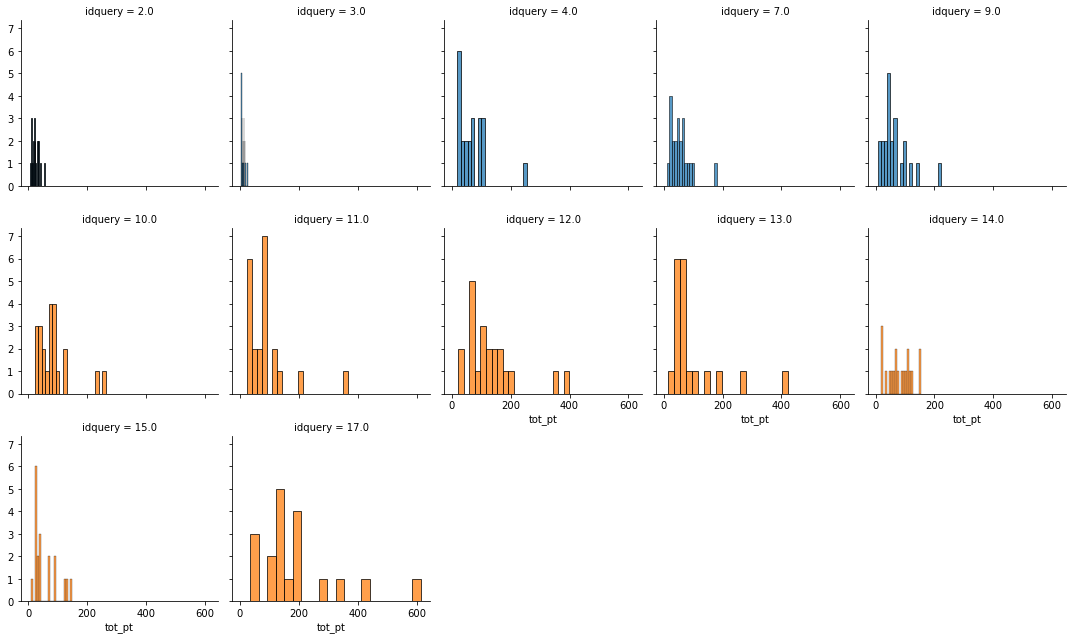

In [17]:
g = sns.FacetGrid(df_sql[['idquery', 'tot_pt', 'is_complex']], col='idquery', hue='is_complex', col_wrap = 5)
g.map(sns.histplot, 'tot_pt', discrete = False, bins = 20)

#### SQL - Attempt Number

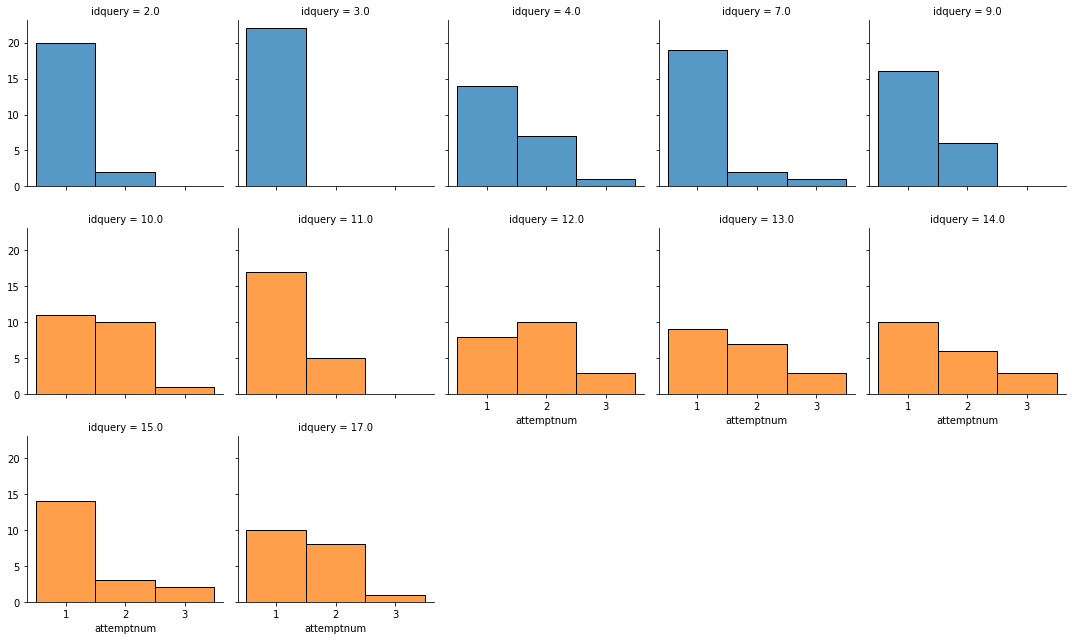

In [18]:
g = sns.FacetGrid(df_sql[['idquery', 'attemptnum', 'is_complex']], col='idquery', hue='is_complex', col_wrap = 5)
g.map(sns.histplot, 'attemptnum', discrete = True)

#### Both - Attempt Number

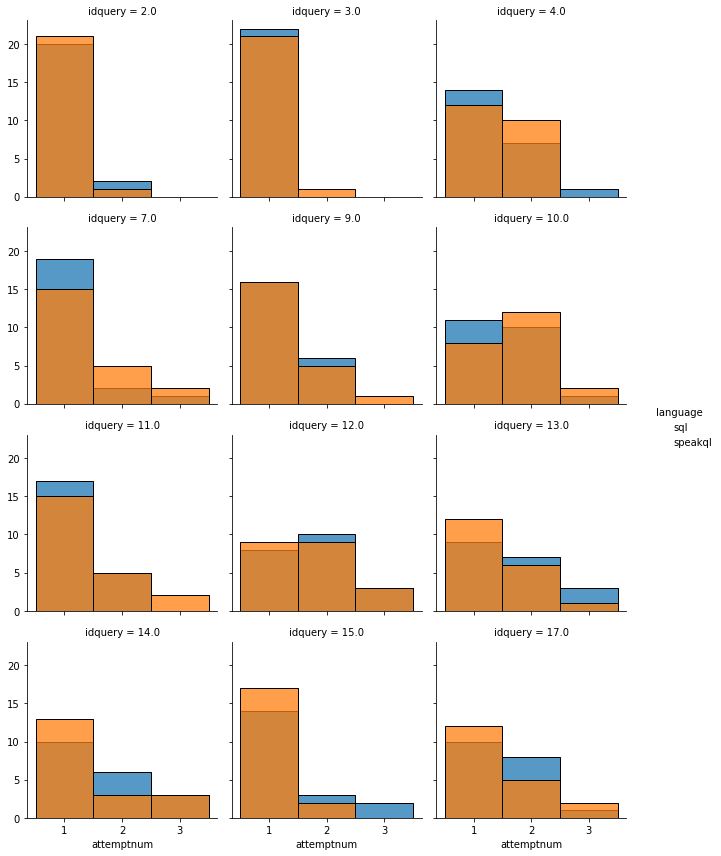

In [19]:
g = sns.FacetGrid(df[['idquery', 'attemptnum', 'is_complex', 'language']], 
                  col='idquery', col_wrap = 3, hue = 'language')
g.add_legend()
g.map_dataframe(sns.histplot, 'attemptnum', bins = 3, discrete = True)

#### Both - Total Planning Time

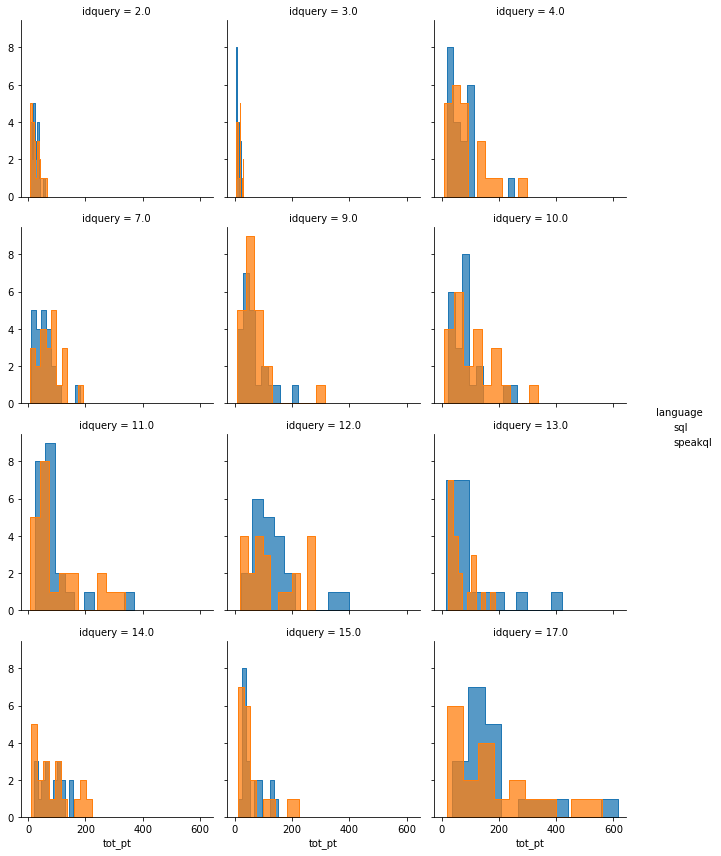

In [20]:
g = sns.FacetGrid(df, col='idquery', col_wrap = 3, hue='language')
g.add_legend()
g.map_dataframe(sns.histplot, 'tot_pt', bins = 10, discrete = False, element = 'step')

#### Both - First Planning Time

In [21]:
df.columns

Index(['Unnamed: 0', 'idparticipant', 'idsession', 'idattemptsubmission',
       'idquery', 'idstep', 'attemptnum', 'total_time', 'recording_time',
       'planning_time', 'tot_pt', 'first_pt', 'tot_tt', 'groupnum', 'step',
       'speakql_first', 'language', 'ispractice', 'correct', 'usedspeakql',
       'complexity', 'normalized', 'is_complex', 'num_mods', 'num_joins',
       'num_funcs', 'num_proj', 'num_tables', 'num_selections',
       'used_unbundling', 'unbundling_possible', 'used_natural_functions',
       'natural_functions_possible', 'used_mod_ordering',
       'mod_ordering_possible', 'used_expression_ordering',
       'expression_ordering_possible', 'used_synonyms', 'synonyms_possible',
       'relative_step'],
      dtype='object')

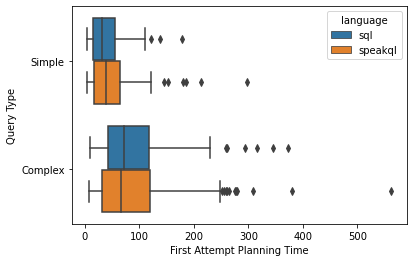

In [22]:
df['Query Type'] = df.apply(lambda row: "Complex" if row.is_complex == 1 else "Simple", axis = 1)
df_temp = df.rename(columns={'first_pt': 'First Attempt Planning Time'})
g = sns.boxplot(data = df_temp, y = 'Query Type', x = 'First Attempt Planning Time', hue = 'language', orient = 'h')


#### Box plots for planning time by query:

[<matplotlib.patches.Rectangle object at 0x000001EF5C566EE0>, <matplotlib.patches.Rectangle object at 0x000001EF5C58AA30>]


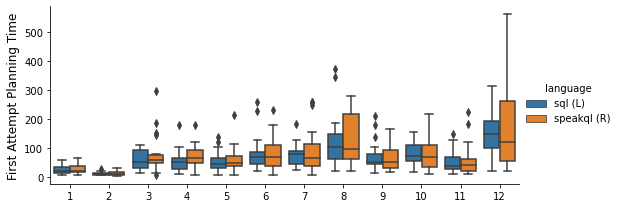

In [23]:
df_temp = df.rename(columns={
    'first_pt': 'First Attempt Planning Time',
    'relative_step': 'Query'
})
df_temp['Query'] = df_temp.apply(lambda row: str(int(row.Query)), axis=1)
df_temp['language'] = df_temp.apply(lambda row: {'sql': 'sql (L)', 'speakql': 'speakql (R)'}[row.language], axis=1)

g = sns.catplot(
    kind='box',data = df_temp, 
    x = 'Query', 
    y = 'First Attempt Planning Time', 
    hue = 'language', 
    orient = 'v',
    aspect = 2.4,
    height = 3
)

g.set_axis_labels("", "First Attempt Planning Time", fontsize='large')

hatches = ['.', '+']

print(g.fig.axes[0].patches)
for i, rect in enumerate(g.fig.axes[0].patches):
    rect.set_hatch(hatches[i])

g.savefig('./query-planning-time-boxplot.pdf', dpi=300)

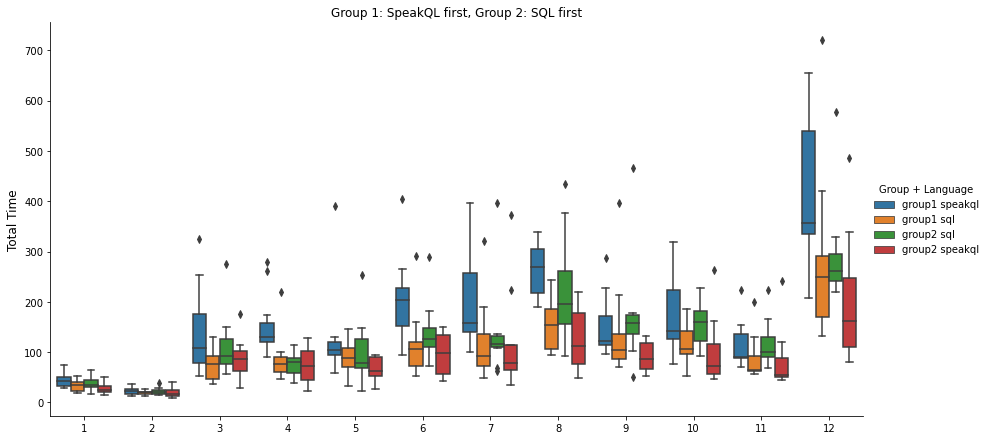

In [24]:
df_temp = df.rename(columns={
    'tot_tt': 'Total Time',
    'relative_step': 'Query'
})
df_temp['Total Time'] = df_temp['Total Time'].astype(int)
df_temp['Query'] = df_temp.apply(lambda row: str(int(row.Query)), axis=1)
df_temp['Group + Language'] = df_temp.apply(lambda row: row.groupnum + " " + row.language, axis = 1) 

g = sns.catplot(
    kind='box',data = df_temp.sort_values(by=['groupnum', 'step']), 
    x = 'Query', 
    y = 'Total Time', 
    hue = 'Group + Language', 
    orient = 'v',
    aspect = 2,
    height = 6,
    legend = True
)

g.set_axis_labels("", "Total Time", fontsize='large')
g.set(title = "Group 1: SpeakQL first, Group 2: SQL first")


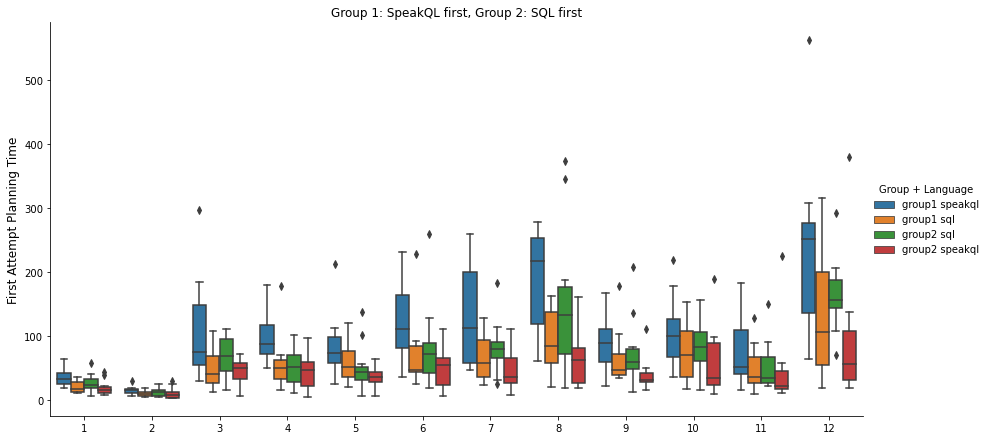

In [25]:
df_temp = df.rename(columns={
    'first_pt': 'First Attempt Planning Time',
    'relative_step': 'Query'
})
df_temp['First Attempt Planning Time'] = df_temp['First Attempt Planning Time'].astype(int)
df_temp['Query'] = df_temp.apply(lambda row: str(int(row.Query)), axis=1)
df_temp['Group + Language'] = df_temp.apply(lambda row: row.groupnum + " " + row.language, axis = 1) 

g = sns.catplot(
    kind='box',data = df_temp.sort_values(by=['groupnum', 'step']), 
    x = 'Query', 
    y = 'First Attempt Planning Time', 
    hue = 'Group + Language', 
    orient = 'v',
    aspect = 2,
    height = 6,
    legend = True
)

g.set_axis_labels("", "First Attempt Planning Time", fontsize='large')
g.set(title = "Group 1: SpeakQL first, Group 2: SQL first")

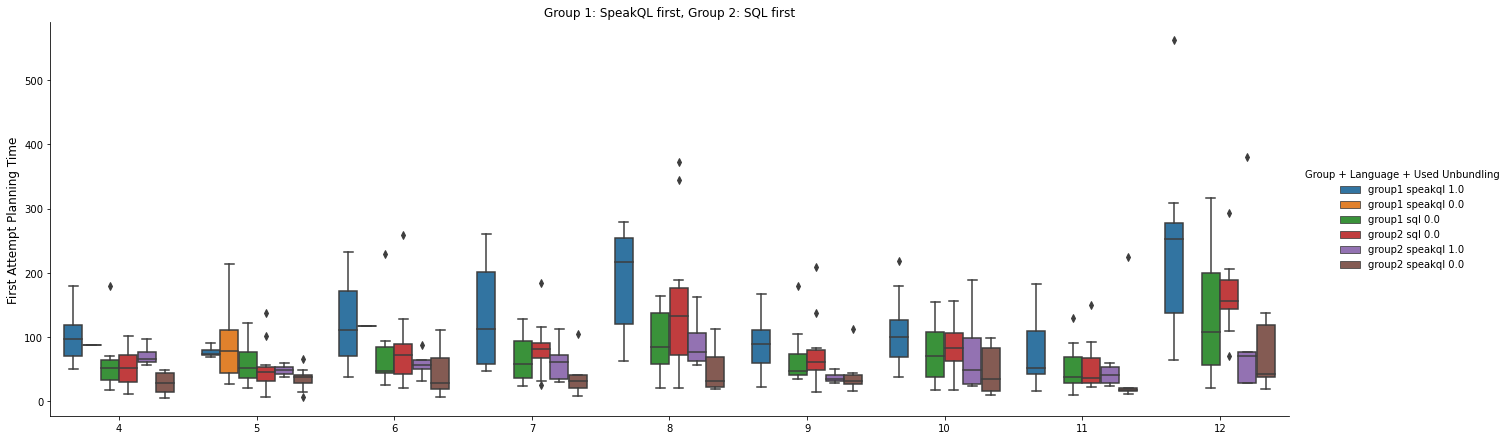

In [26]:
df_temp = df.rename(columns={
    'first_pt': 'First Attempt Planning Time',
    'relative_step': 'Query'
})
df_temp['First Attempt Planning Time'] = df_temp['First Attempt Planning Time'].astype(int)
df_temp['query_int'] = df_temp.Query
df_temp['Query'] = df_temp.apply(lambda row: str(int(row.Query)), axis=1)
df_temp['Group + Language + Used Unbundling'] = df_temp.apply(lambda row: row.groupnum + " " + row.language + " " + str(row.used_unbundling), axis = 1) 

g = sns.catplot(
    kind='box',
    data = df_temp.sort_values(by=['groupnum', 'step']).query("query_int > 3"), 
    x = 'Query', 
    y = 'First Attempt Planning Time', 
    hue = 'Group + Language + Used Unbundling', 
    orient = 'v',
    aspect = 3,
    height = 6,
    legend = True
)

g.set_axis_labels("", "First Attempt Planning Time", fontsize='large')
g.set(title = "Group 1: SpeakQL first, Group 2: SQL first")

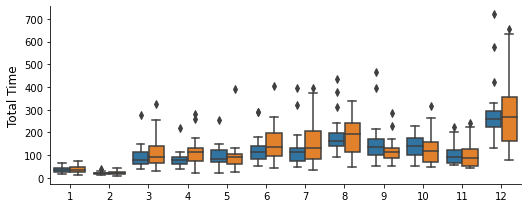

In [27]:
df_temp = df.rename(columns={
    'tot_tt': 'Total Time',
    'relative_step': 'Query'
})
df_temp['Total Time'] = df_temp['Total Time'].astype(int)
df_temp['Query'] = df_temp.apply(lambda row: str(int(row.Query)), axis=1)
df_temp['language'] = df_temp.apply(lambda row: {'sql': 'sql (L)', 'speakql': 'speakql (R)'}[row.language], axis=1)


g = sns.catplot(
    kind='box',data = df_temp, 
    x = 'Query', 
    y = 'Total Time', 
    hue = 'language', 
    orient = 'v',
    aspect = 2.4,
    height = 3,
    legend = False
)

g.set_axis_labels("", "Total Time", fontsize='large')

g.savefig('./query-total-time-boxplot.pdf', dpi=300)

#### Box plots for planning time by query by group

#### Box plots for total time by query:

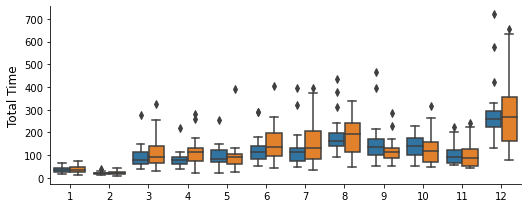

In [28]:
df_temp = df.rename(columns={
    'tot_tt': 'Total Time',
    'relative_step': 'Query'
})
df_temp['Total Time'] = df_temp['Total Time'].astype(int)
df_temp['Query'] = df_temp.apply(lambda row: str(int(row.Query)), axis=1)
df_temp['language'] = df_temp.apply(lambda row: {'sql': 'sql (L)', 'speakql': 'speakql (R)'}[row.language], axis=1)


g = sns.catplot(
    kind='box',data = df_temp, 
    x = 'Query', 
    y = 'Total Time', 
    hue = 'language', 
    orient = 'v',
    aspect = 2.4,
    height = 3,
    legend = False
)

g.set_axis_labels("", "Total Time", fontsize='large')

g.savefig('./query-total-time-boxplot.pdf', dpi=300)

In [29]:
df.columns

Index(['Unnamed: 0', 'idparticipant', 'idsession', 'idattemptsubmission',
       'idquery', 'idstep', 'attemptnum', 'total_time', 'recording_time',
       'planning_time', 'tot_pt', 'first_pt', 'tot_tt', 'groupnum', 'step',
       'speakql_first', 'language', 'ispractice', 'correct', 'usedspeakql',
       'complexity', 'normalized', 'is_complex', 'num_mods', 'num_joins',
       'num_funcs', 'num_proj', 'num_tables', 'num_selections',
       'used_unbundling', 'unbundling_possible', 'used_natural_functions',
       'natural_functions_possible', 'used_mod_ordering',
       'mod_ordering_possible', 'used_expression_ordering',
       'expression_ordering_possible', 'used_synonyms', 'synonyms_possible',
       'relative_step', 'Query Type'],
      dtype='object')

#### SpeakQL AttemptNum Hist Bar Plot

<AxesSubplot:xlabel='relative_step', ylabel='Count'>

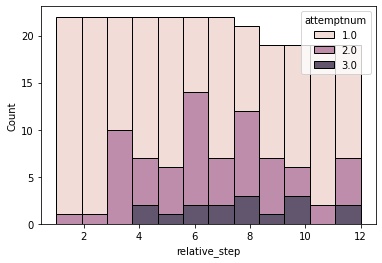

In [30]:
sns.histplot(df.where(df.language=="speakql").dropna(how='all'), x='relative_step', hue='attemptnum', multiple='stack', bins=12)


<AxesSubplot:xlabel='language', ylabel='Count'>

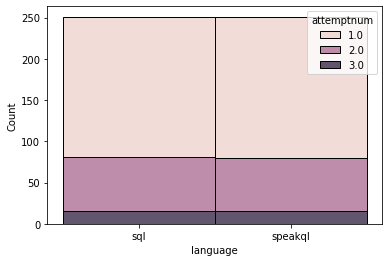

In [31]:
sns.histplot(df, x='language', hue='attemptnum', multiple='stack', bins=12)


<AxesSubplot:xlabel='relative_step', ylabel='Count'>

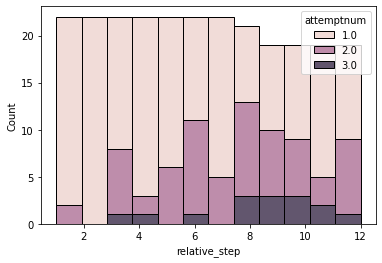

In [32]:
sns.histplot(df.where(df.language=="sql").dropna(how='all'), x='relative_step', hue='attemptnum', multiple='stack', bins=12)


#### SpeakQL and SQL attempt num hist plot by query

In [33]:
import matplotlib.pyplot as plot

categories = [3, 2, 1]
df[['relative_step', 'language', 'attemptnum', 'idattemptsubmission']].groupby(
    by=['relative_step', 'language', 'attemptnum']
).count()


idattemptsubmission
relative_step language attemptnum                     
1.0           speakql  1.0                          21
                       2.0                           1
              sql      1.0                          20
                       2.0                           2
2.0           speakql  1.0                          21
...                                                ...
12.0          speakql  2.0                           5
                       3.0                           2
              sql      1.0                          10
                       2.0                           8
                       3.0                           1

[63 rows x 1 columns]

In [34]:
df.to_excel('attempt-num-boxplot.xlsx')

[<matplotlib.patches.Rectangle object at 0x000001EF668B6580>, <matplotlib.patches.Rectangle object at 0x000001EF66872F70>, <matplotlib.patches.Rectangle object at 0x000001EF668F0070>, <matplotlib.patches.Rectangle object at 0x000001EF668D2940>]


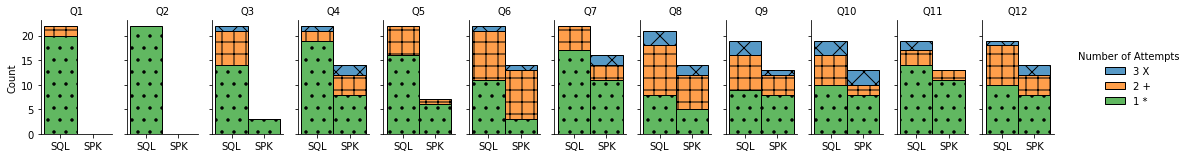

In [55]:
attempt_legend = {1: "1 *", 2: "2 +", 3: "3 X"}

df_temp['Number of Attempts'] = df.apply(lambda row: attempt_legend[int(row.attemptnum)], axis = 1)
df_temp['Dialect'] = df.apply(lambda row: 'SQL' if row.language == 'sql' else 'SPK', axis = 1)
df_temp['Q'] = df.apply(lambda row: str(int(row.relative_step)), axis = 1)

df_temp.to_excel("./df_temp.xlsx")

g = sns.displot(
    df_temp, 
    x='Dialect', 
    col='Q', 
    hue='Number of Attempts', 
    hue_order=['3 X', '2 +', '1 *'],
    col_wrap=12,
    height=2.5,
    aspect=.5,
    kind='hist',
    multiple='stack',
    stat='count'
)

hatches = ['.', '.', '+', '+', 'x', 'x']

g.set_axis_labels("")
g.set_titles("Q" + "{col_name}")

print(g.fig.axes[0].patches)

for ax in g.fig.axes:
    for i, bar in enumerate(ax.patches):
        bar.set_hatch(hatches[i])
        

# for i, bar in enumerate(g.fig.patches):

g.savefig('./query-attemptnum-histplot.pdf', dpi=300)

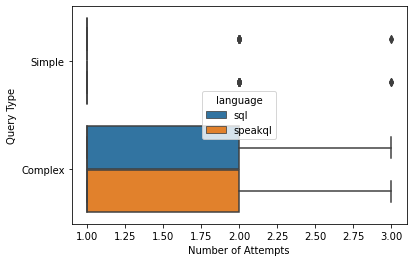

In [36]:
df['Query Type'] = df.apply(lambda row: "Complex" if row.is_complex == 1 else "Simple", axis = 1)
df_temp = df.rename(columns={'attemptnum': 'Number of Attempts'})
g = sns.boxplot(data = df_temp, y = 'Query Type', x = 'Number of Attempts', hue = 'language', orient = 'h')


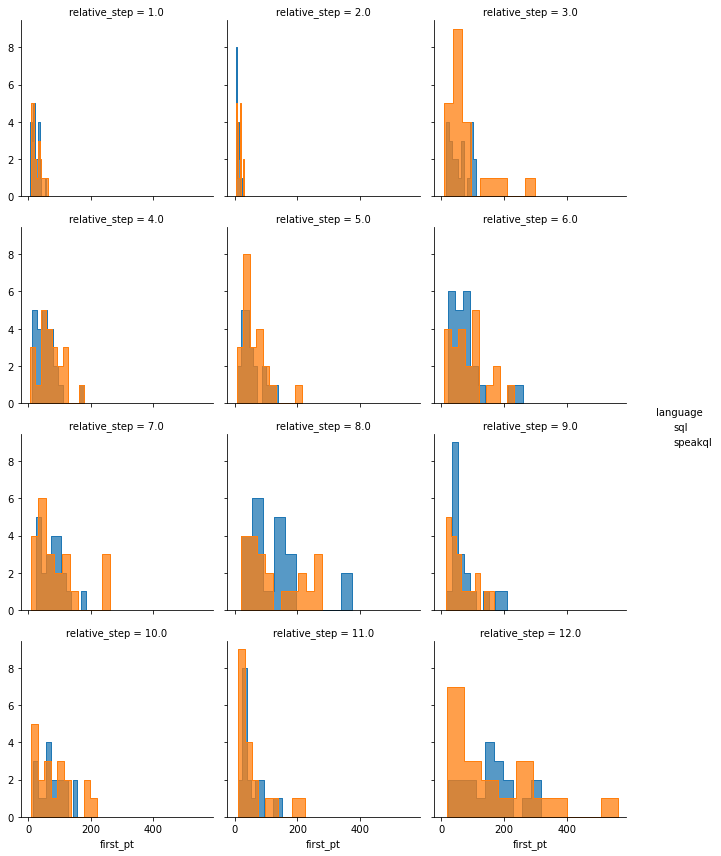

In [37]:
g = sns.FacetGrid(df, col='relative_step', col_wrap = 3, hue='language')
g.add_legend()
g.map_dataframe(sns.histplot, 'first_pt', bins = 10, discrete = False, element = 'step')

#### Both - Speaking Time

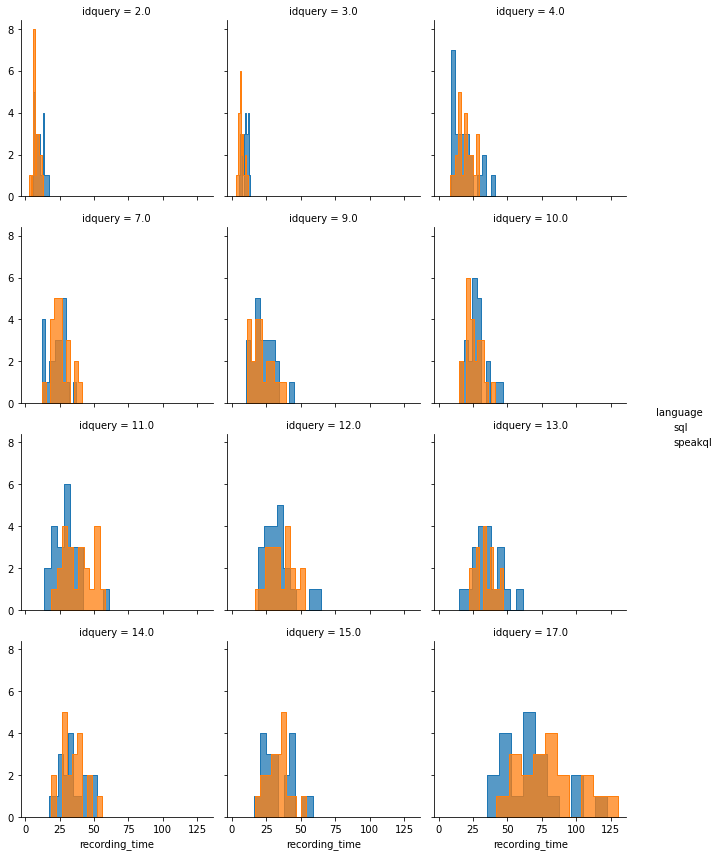

In [38]:
g = sns.FacetGrid(df, col='idquery', col_wrap = 3, hue='language')
g.add_legend()
g.map_dataframe(sns.histplot, 'recording_time', bins = 10, discrete = False, element = 'step')

### Mann-Whitney U Test and Independent T Tests
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html
https://het.as.utexas.edu/HET/Software/Scipy/generated/scipy.stats.ttest_ind.html

#### Mann Whitney tests of all dependent variables for simple and complex queries

In [39]:
from scipy.stats import mannwhitneyu as mwu
from scipy.stats import wilcoxon as wil
from scipy.stats import ttest_ind
from scipy.ndimage import median
from scipy.ndimage import mean

mwu_results = {}

# dep_vars = ['total_time', 'recording_time', 'planning_time', 'tot_pt', 'first_pt', 'tot_tt', 'attemptnum']
dep_vars = ['first_pt', 'recording_time', 'tot_tt']

for simple in range(0,2):
    subset_sql = df_sql.where(df_sql.is_complex == simple).dropna(how = 'all').sort_values(by=['idparticipant', 'idquery'])
    subset_speakql = df_speakql.where(df_speakql.is_complex == simple).dropna(how = 'all').sort_values(by=['idparticipant', 'idquery'])
    print("shape:", subset_sql.shape[0], subset_speakql.shape[0])
    for dep_var in dep_vars:
        mwu_results[(dep_var, simple)] = {
            'u_test_pval' : mwu(
            x = subset_sql[dep_var],
            y = subset_speakql[dep_var]
            )[1],
            'median_sql' : median(subset_sql[dep_var]),
            'median_speakql' : median(subset_speakql[dep_var]),
            
            't_test_pval' : ttest_ind(
                a = subset_sql[dep_var].astype(float),
                b = subset_speakql[dep_var].astype(float)
            )[1],
            'mean_sql': subset_sql[dep_var].mean(),
            'mean_speakql' : subset_speakql[dep_var].mean(),
            
            'wilcoxon_pval' : wil(
                x = subset_sql[dep_var],
                y = subset_speakql[dep_var]
            )[1]
        }
pd.DataFrame(mwu_results).transpose()

shape: 110 110
shape: 141 141


,,u_test_pval,median_sql,median_speakql,t_test_pval,mean_sql,mean_speakql,wilcoxon_pval
first_pt,0,0.143756,31.5,38.5,0.107657,40.963636,49.863636,0.065414
recording_time,0,0.214470,13.5,15.5,0.685223,16.636364,16.145455,0.150471
tot_tt,0,0.222193,55.5,58.5,0.160853,64.981818,75.945455,0.040676
first_pt,1,0.294717,72.0,66.0,0.550174,90.780142,96.354610,0.432896
recording_time,1,0.122250,32.0,34.0,0.230334,36.907801,39.567376,0.000592
tot_tt,1,0.335952,137.0,131.0,0.772597,161.652482,165.418440,0.527156


#### Mann Whitney tests of all dependent variables for individual queries

In [40]:
df.columns

Index(['Unnamed: 0', 'idparticipant', 'idsession', 'idattemptsubmission',
       'idquery', 'idstep', 'attemptnum', 'total_time', 'recording_time',
       'planning_time', 'tot_pt', 'first_pt', 'tot_tt', 'groupnum', 'step',
       'speakql_first', 'language', 'ispractice', 'correct', 'usedspeakql',
       'complexity', 'normalized', 'is_complex', 'num_mods', 'num_joins',
       'num_funcs', 'num_proj', 'num_tables', 'num_selections',
       'used_unbundling', 'unbundling_possible', 'used_natural_functions',
       'natural_functions_possible', 'used_mod_ordering',
       'mod_ordering_possible', 'used_expression_ordering',
       'expression_ordering_possible', 'used_synonyms', 'synonyms_possible',
       'relative_step', 'Query Type'],
      dtype='object')

In [41]:
mwu_results = {}
dep_vars = ['first_pt', 'recording_time', 'tot_tt']
dep_vars = ['recording_time']

for idquery in df.idquery.unique():
    subset_sql = df_sql.where(df_sql.idquery == idquery).dropna(how = 'all')
    subset_speakql = df_speakql.where(df_speakql.idquery == idquery).dropna(how = 'all')
    for dep_var in dep_vars:
        mwu_results[(dep_var, idquery)] = {
            'u_test_pval' : mwu(
            x = subset_sql[dep_var],
            y = df_speakql.where(df_speakql.idquery == idquery).dropna(how = 'all')[dep_var]
            )[1],
            'median_sql' : subset_sql[dep_var].median(),
            'median_speakql' : subset_speakql[dep_var].median()
#             't_test_pval' : ttest_ind(
#                 a = subset_sql[dep_var].astype(float),
#                 b = subset_speakql[dep_var].astype(float)
#             )[1],
#             'mean_sql': subset_sql[dep_var].mean(),
#             'mean_speakql' : subset_speakql[dep_var].mean()
        }
               
print(pd.DataFrame(mwu_results).transpose())
# pd.DataFrame(mwu_results).transpose().to_excel('query_utest.xlsx')
print(pd.DataFrame(mwu_results).transpose().to_latex())


                     u_test_pval  median_sql  median_speakql
recording_time 2.0      0.002310        10.0             7.5
               3.0      0.001484        10.0             6.0
               4.0      0.179456        16.5            19.0
               7.0      0.147531        24.0            24.0
               9.0      0.302412        21.0            20.0
               10.0     0.318916        26.0            25.0
               11.0     0.012078        29.0            38.5
               12.0     0.224763        32.0            34.0
               13.0     0.385004        34.0            34.0
               14.0     0.488340        33.0            35.0
               15.0     0.447685        30.0            32.0
               17.0     0.047982        66.0            79.0
\begin{tabular}{llrrr}
\toprule
               &      &  u\_test\_pval &  median\_sql &  median\_speakql \\
\midrule
recording\_time & 2.0  &     0.002310 &        10.0 &             7.5 \\
               & 

## Feature Usage Statistics

### Unbundling Usage Analysis
Here we are comparing dependent variables for participants who used unbundling. We do not include SpeakQL or SQL data for participants who did not use unbundling.

##### Result:
It appears that, for SpeakQL queries where unbundling was used, compared to SQL queries by participants who used unbundling, first planning time took longer for SpeakQL queries (p < 0.05). 

##### Problem:
Unbundling was used less frequently in the SQL first group, which is a major confounder for this statistic.

In [42]:
from scipy.stats import mannwhitneyu as mwu
from scipy.stats import ttest_ind
from scipy.ndimage import median
from scipy.ndimage import mean

features = [
    'unbundling', 'natural_functions', 'mod_ordering', 'expression_ordering', 'synonyms'
]

for feature in features:
    print("\n\nFeature:", feature)
    if feature == 'unbundling':
        ub_df = df_speakql.where(df_speakql.num_joins > 0).dropna(how = 'all')
        ub_sql_df = df_sql.where(df_sql.num_joins > 0).dropna(how = 'all')
        ub_used = ub_df.where(ub_df.used_unbundling == 1).dropna(how = 'all')
        
    if feature == 'natural_functions':
        ub_df = df_speakql.where(df_speakql.num_funcs > 0).dropna(how = 'all')
        ub_sql_df = df_sql.where(df_sql.num_funcs > 0).dropna(how = 'all')
        ub_used = ub_df.where(ub_df.used_natural_functions == 1).dropna(how = 'all')
        
    if feature == 'mod_ordering':
        ub_df = df_speakql.where(df_speakql.num_mods > 0).dropna(how = 'all')
        ub_sql_df = df_sql.where(df_sql.num_mods > 0).dropna(how = 'all')
        ub_used = ub_df.where(ub_df.used_mod_ordering == 1).dropna(how = 'all')
        
    if feature == 'expression_ordering':
        ub_df = df_speakql
        ub_sql_df = df_sql
        ub_used = ub_df.where(ub_df.used_expression_ordering == 1).dropna(how = 'all')
        
    if feature == 'synonyms':
        ub_df = df_speakql
        ub_sql_df = df_sql
        ub_used = ub_df.where(ub_df.used_synonyms == 1).dropna(how = 'all')

    ub_sql_df = ub_sql_df.where(ub_sql_df.idparticipant.isin(ub_used.idparticipant)).dropna(how = 'all')
            
    print(ub_df.shape)
    print(ub_used.shape)
    print(ub_sql_df.shape)

    mwu_results = {}

    # dep_vars = ['total_time', 'recording_time', 'planning_time', 'tot_pt', 'first_pt', 'tot_tt', 'attemptnum']
    dep_vars = ['first_pt', 'tot_pt']

    for simple in range(0,2):
        subset_used = ub_used.where(ub_used.is_complex == simple).dropna(how = 'all')
        subset_sql = ub_sql_df.where(ub_sql_df.is_complex == simple).dropna(how = 'all')
        for dep_var in dep_vars:
            mwu_results[(dep_var, simple)] = {
                'u_test_pval' : mwu(
                x = subset_used[dep_var],
                y = subset_sql[dep_var]
                )[1],
                'median_used' : median(subset_used[dep_var]),
                'median_sql' : median(subset_sql[dep_var]),
            }
    print(pd.DataFrame(mwu_results).transpose())




Feature: unbundling
(163, 40)
(111, 40)
(119, 40)
            u_test_pval  median_used  median_sql
first_pt 0     0.002203         82.5        51.5
tot_pt   0     0.001121         84.5        51.5
first_pt 1     0.010105         88.0        69.0
tot_pt   1     0.013096        100.0        73.0


Feature: natural_functions
(166, 40)
(135, 40)
(150, 40)
            u_test_pval  median_used  median_sql
first_pt 0     0.345510         20.5        20.5
tot_pt   0     0.336140         21.0        21.0
first_pt 1     0.412466         59.0        65.0
tot_pt   1     0.372063         63.0        71.5


Feature: mod_ordering
(100, 40)
(2, 40)
(10, 40)
            u_test_pval  median_used  median_sql
first_pt 0     0.000000          NaN         NaN
tot_pt   0     0.000000          NaN         NaN
first_pt 1     0.226049        123.0       167.5
tot_pt   1     0.226049        123.0       176.0


Feature: expression_ordering
(251, 40)
(21, 40)
(96, 40)
            u_test_pval  median_used  median

C:\Users\KYLEL\anaconda3\lib\site-packages\scipy\stats\stats.py:7171: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd
C:\Users\KYLEL\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\KYLEL\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


### Plot correlation between planning time and attempt numbers

In [43]:
df.columns

Index(['Unnamed: 0', 'idparticipant', 'idsession', 'idattemptsubmission',
       'idquery', 'idstep', 'attemptnum', 'total_time', 'recording_time',
       'planning_time', 'tot_pt', 'first_pt', 'tot_tt', 'groupnum', 'step',
       'speakql_first', 'language', 'ispractice', 'correct', 'usedspeakql',
       'complexity', 'normalized', 'is_complex', 'num_mods', 'num_joins',
       'num_funcs', 'num_proj', 'num_tables', 'num_selections',
       'used_unbundling', 'unbundling_possible', 'used_natural_functions',
       'natural_functions_possible', 'used_mod_ordering',
       'mod_ordering_possible', 'used_expression_ordering',
       'expression_ordering_possible', 'used_synonyms', 'synonyms_possible',
       'relative_step', 'Query Type'],
      dtype='object')

SQL LinregressResult(slope=0.0013796722267692782, intercept=1.2873441930021152, rvalue=0.14036351522510263, pvalue=0.0261688835709553, stderr=0.0006167385411236176, intercept_stderr=0.05664459863640047)

SpeakQL LinregressResult(slope=0.0018926680111567282, intercept=1.2386650532240242, rvalue=0.23778155939536133, pvalue=0.0001429235841242314, stderr=0.000489957406900818, intercept_stderr=0.05257204053720076)


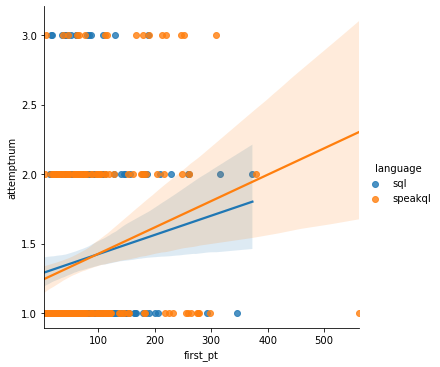

In [44]:
from scipy.stats import linregress

sql_result = linregress(x = df.query('language == "sql"').first_pt, y = df.query('language == "sql"').attemptnum)
speakql_result = linregress(x = df.query('language == "speakql"').first_pt, y = df.query('language == "speakql"').attemptnum)

print("SQL", sql_result)
print("\nSpeakQL", speakql_result)

sns.lmplot(
    data = df,
    x = 'first_pt',
    y = 'attemptnum',
    hue = 'language'
)

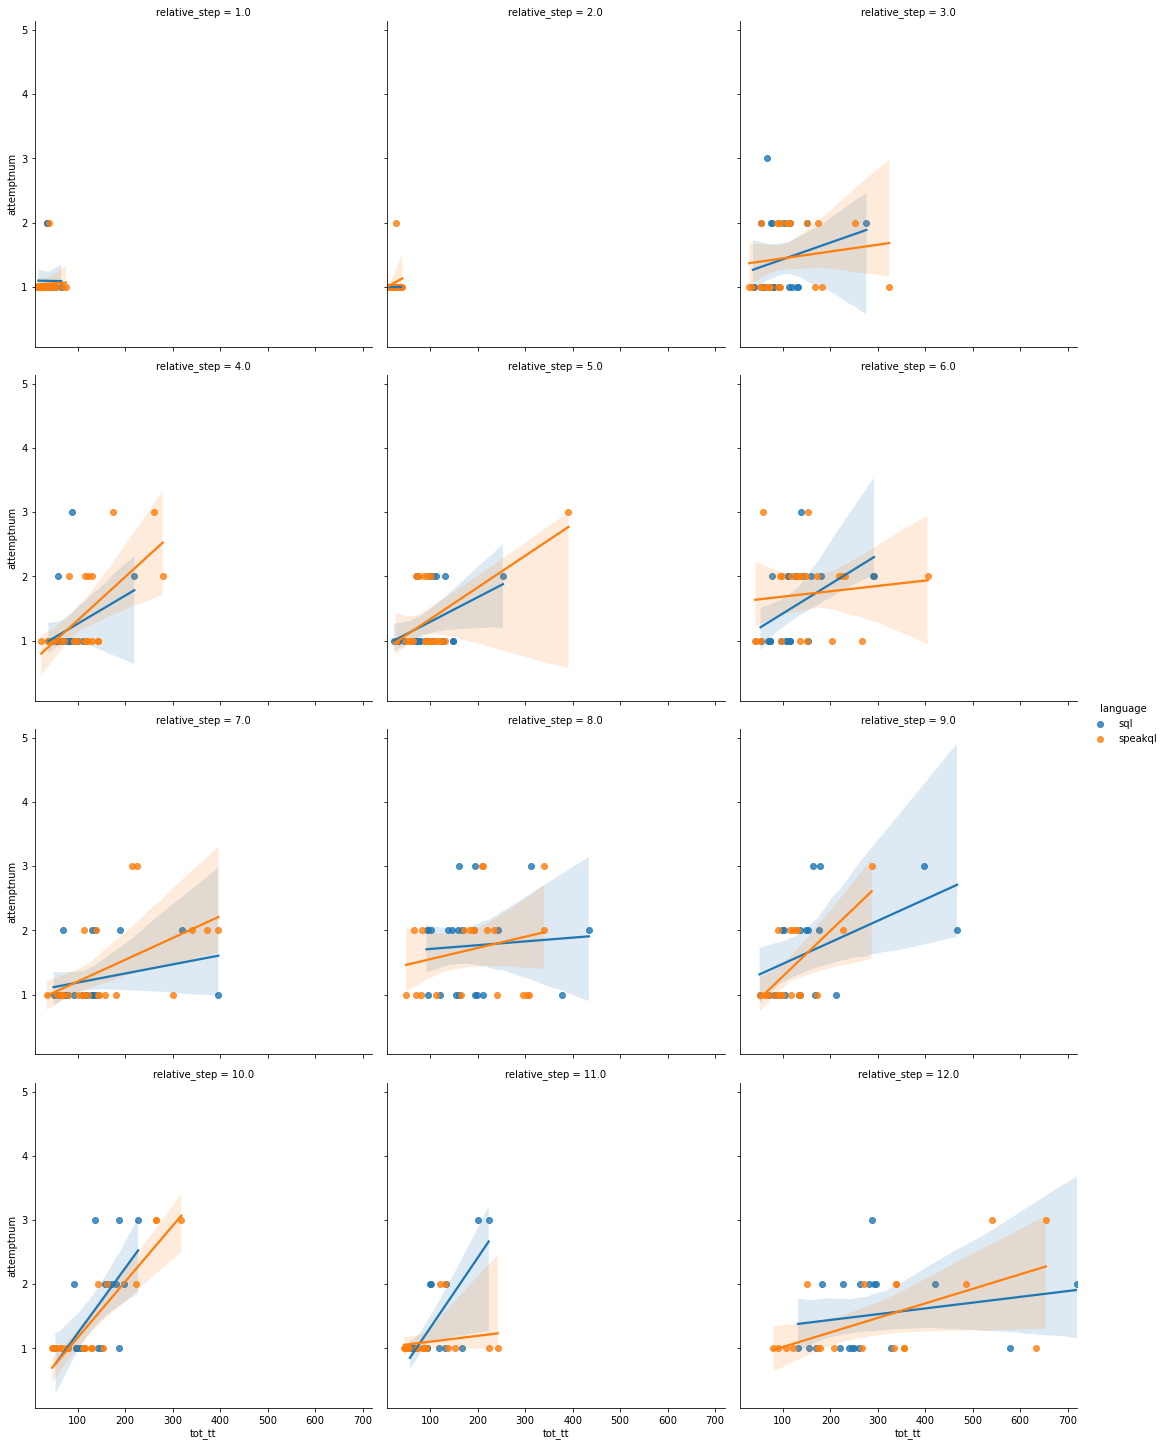

In [45]:
sns.lmplot(
    data = df,
    x = 'tot_tt',
    y = 'attemptnum',
    col = 'relative_step',
    col_wrap = 3,
    hue='language'
)

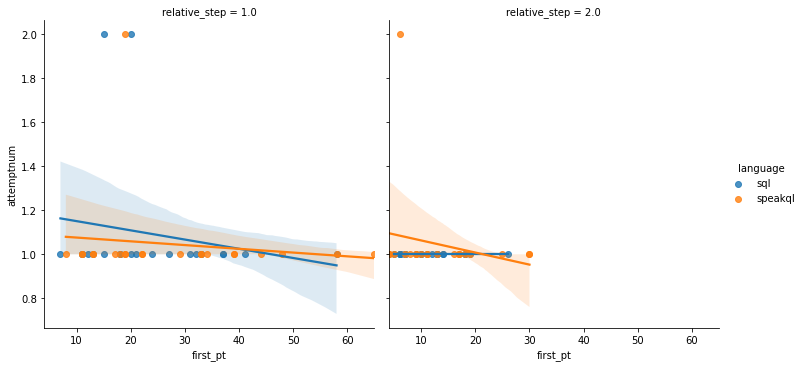

In [46]:
sns.lmplot(
    data = df.query("relative_step < 3"),
    x = 'first_pt',
    y = 'attemptnum',
    col = 'relative_step',
    col_wrap = 2,
    hue='language'
)

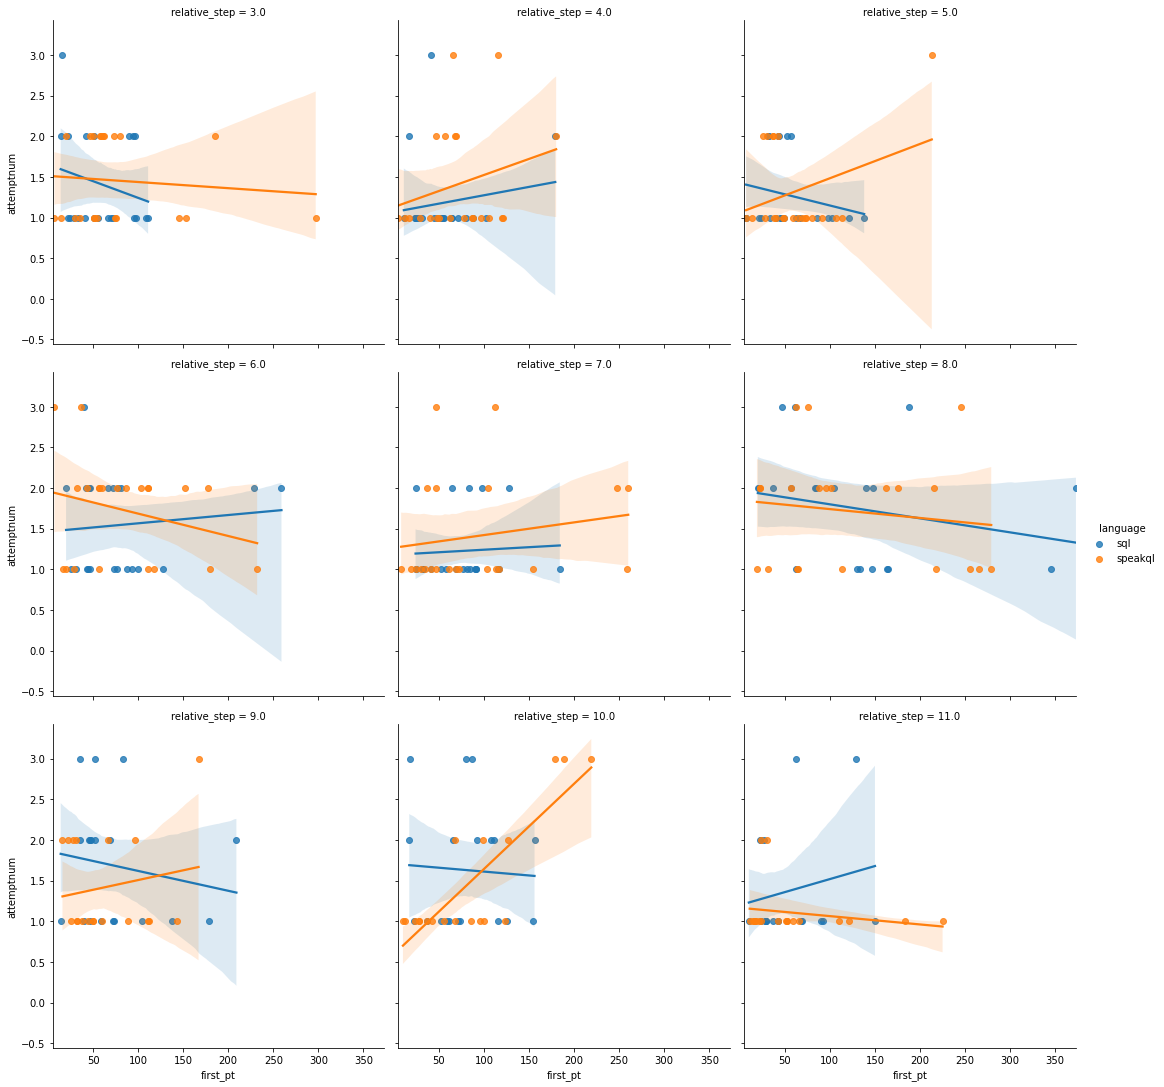

In [47]:
sns.lmplot(
    data = df.query("relative_step > 2 and relative_step < 12"),
    x = 'first_pt',
    y = 'attemptnum',
    col = 'relative_step',
    col_wrap = 3,
    hue='language'
)

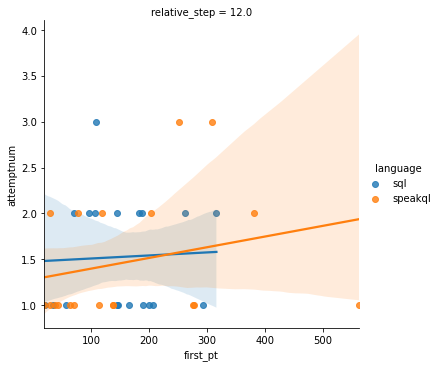

In [48]:
sns.lmplot(
    data = df.query("relative_step == 12"),
    x = 'first_pt',
    y = 'attemptnum',
    col = 'relative_step',
    col_wrap = 1,
    hue='language'
)